Open and reshape data

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os import listdir
import pdb


In [2]:
# READ AND FORMAT DATA FILES

def read_files(where,files):    
    Data=[];
    for f in files:
        print(f)
        Pair={};
        i1=f.find('-');
        i2=f.find('_');
        i3=f[i1+1:].find('-')+i1+1;
        i4=f[i2+1:].find('_')+i2+1;
        Pair['Teachers_age']=int(f[0:i1]);
        Pair['Teachers_Id']=int(f[i1+1:i2]);
        Pair['Learners_age']=int(f[i2+1:i3]);    
        Pair['Learners_Id']=int(f[i3+1:i4]);             
        if Pair['Teachers_Id']>=400 or Pair['Learners_Id']>=400:
            Pair['Conscent']=False;
        else:
            Pair['Conscent']=True;
            
        df = pd.read_csv(where+f, delimiter=',');
        columns=df.columns.tolist();        
        tuples = [tuple(x) for x in df.values];
        Pair['Total_time']=int(tuples[-1][columns.index('time_elapsed')])/60000; # minutes
        Pair['Trials']=[];
        n_trial=0;
        for row in tuples:
            if row[1]=='teacher' or row[1]=='learner':
                n_trial+=1;
                if n_trial>2: # first two trials are training                    
                    circles=row[columns.index('Circles')];
                    crosses=row[columns.index('Crosses')];
                    circles_list=[];
                    crosses_list=[];
                    if not(pd.isnull(circles)):           
                        circles=circles.split(",");            
                        for element in circles:                
                            if element[0]=='[':
                                element=element[1:];
                            if element[-1]==']':
                                element=element[0:-1];
                            circles_list.append(float(element));
                        circles_list = list(zip(*[iter(circles_list)] * 2));
                    if not(pd.isnull(crosses)):    
                        crosses=crosses.split(",");            
                        for element in crosses:
                            if element[0]=='[':
                                element=element[1:];
                            if element[-1]==']':
                                element=element[0:-1];
                            crosses_list.append(float(element));
                        crosses_list = list(zip(*[iter(crosses_list)] * 2))                                
                    teachers_box=row[columns.index('Teachers_Box')];
                    teachers_box=teachers_box[1:-1];
                    teachers_box=teachers_box.split(",");   
                    aux=[];
                    for element in teachers_box:
                        element=int(element);
                        aux.append(element);
                    teachers_box=aux;
                    learners_guess=row[columns.index('Learners_Guess')];
                    learners_guess=learners_guess.split(",");
                    learners_guess_list=[];
                    for element in learners_guess:
                        if element[0]=='[':
                            element=element[1:];
                        if element[-1]==']':
                            element=element[0:-1];
                        learners_guess_list.append(float(element));
                    learners_guess_list = list(zip(*[iter(learners_guess_list)] * 4))  
                    won=row[columns.index('won')];
                    Pair['Trials'].append({'Teachers_box':teachers_box,'Circles':circles_list,'Crosses':crosses_list,'Learners_guess':learners_guess_list,'won':won});
        Data.append(Pair);
    return Data;

In [3]:
# ADD MISSING FILES

where='/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Dynamic/without_time_info/teachers/';
files=[];
for file in listdir(where):
    if file.endswith(".csv"):
        files.append(file);

Data=read_files(where,files);


where='/home/ahaimovici/Documents/Teaching/Rectangle_Game/C3/Data/Dynamic/without_time_info/learners/';
files=[];
for file in listdir(where):
    if file.endswith(".csv"):
        files.append(file);
Data_L=read_files(where,files);

New_data=[];
for P in Data_L:
    new_pair=True;
    for Q in Data:
        if P['Teachers_Id']==Q['Teachers_Id'] and P['Learners_Id']==Q['Learners_Id']:
            new_pair=False;
    if new_pair:
        New_data.append(P);
for P in New_data:
    Data.append(P);





40-10_35-11_teacher_dynamic.csv
10-233_10-232_teacher_dynamic.csv
10-211_12-204_teacher_dynamic.csv
16-224_18-16_teacher_dynamic.csv
10-232_10-233_teacher_dynamic.csv
8-215_7-216_teacher_dynamic.csv
42-8_56-07_teacher_dynamic.csv
7-215_7-252_teacher_dynamic.csv
10-242_10-234_teacher_dynamic.csv
8-403_8-223_teacher_dynamic.csv
38-5_50-3_teacher_dynamic.csv
10-210_9-213_teacher_dynamic.csv
9-201_9-01_teacher_dynamic.csv
56-25_52-24_teacher_dynamic.csv
28-200_20-02_teacher_dynamic.csv
56-25_52-24_learner_dynamic.csv
10-242_10-234_learner_dynamic.csv
6-217_11-218_learner_dynamic.csv
38-5_50-3_learner_dynamic.csv
7-215_7-252_learner_dynamic.csv
28-200_20-02_learner_dynamic.csv
16-224_18-16_learner_dynamic.csv
10-211_12-204_learner_dynamic.csv
9-201_9-01_learner_dynamic.csv
10-210_9-213_learner_dynamic.csv
10-233_10-232_learner_dynamic.csv
8-215_7-216_learner_dynamic.csv
8-403_8-223_learner_dynamic.csv
40-10_35-11_learner_dynamic.csv
42-8_56-07_learner_dynamic.csv


In [4]:
Data

[{'Conscent': True,
  'Learners_Id': 11,
  'Learners_age': 35,
  'Teachers_Id': 10,
  'Teachers_age': 40,
  'Total_time': 15.9152,
  'Trials': [{'Circles': [(479.0, 175.0)],
    'Crosses': [(457.0, 169.0), (599.0, 179.0), (533.0, 463.0)],
    'Learners_guess': [(392.0, 495.0, 73.0, 184.0),
     (468.0, 608.0, 170.0, 277.0),
     (466.0, 589.0, 162.0, 247.0),
     (471.0, 589.0, 166.0, 433.0)],
    'Teachers_box': [466, 591, 157, 454],
    'won': True},
   {'Circles': [(626.0, 282.0), (631.0, 708.0)],
    'Crosses': [(713.0, 285.0)],
    'Learners_guess': [(610.0, 826.0, 275.0, 349.0),
     (619.0, 646.0, 276.0, 718.0),
     (620.0, 698.0, 274.0, 722.0)],
    'Teachers_box': [618, 704, 269, 722],
    'won': True},
   {'Circles': [(682.0, 402.0)],
    'Crosses': [(667.0, 401.0), (769.0, 401.0), (717.0, 510.0)],
    'Learners_guess': [(153.0, 692.0, 395.0, 617.0),
     (673.0, 814.0, 391.0, 505.0),
     (674.0, 761.0, 395.0, 450.0),
     (675.0, 760.0, 399.0, 496.0)],
    'Teachers_box': 

In [14]:
Data[0]['Trials'][0]['Learners_guess'][-1]


2

In [12]:
def draw_trial(trial):
    box=trial['Teachers_box'];
    box_lerner=trial['Learners_guess'][-1];
    fig=plt.figure;
    plt.plot([box[0],box[0],box[1],box[1],box[0]],[box[3],box[2],box[2],box[3],box[3]],'b')
    plt.plot([box_lerner[0],box_lerner[0],box_lerner[1],box_lerner[1],box_lerner[0]],[box_lerner[3],box_lerner[2],box_lerner[2],box_lerner[3],box_lerner[3]],'r')
    diff1=abs(box[x]-box_lerner[0])
    for circle in trial['Circles']:
        plt.plot(circle[0],circle[1],'og')    
    for cross in trial['Crosses']:
        plt.plot(cross[0],cross[1],'xk')                
    plt.show()
    plt.ylim([0,864]);
    plt.xlim([0,864]);
    

Learners Age: 35 Teachers Age 40
won: True


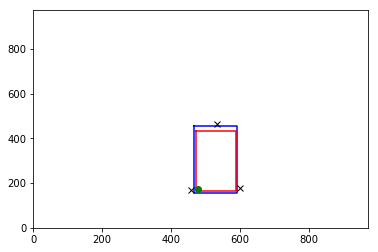

won: True


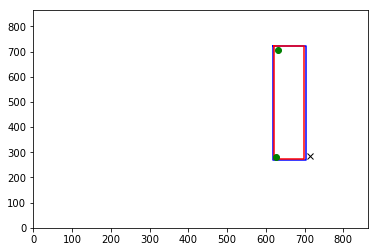

won: True


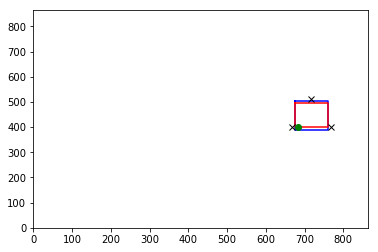

won: True


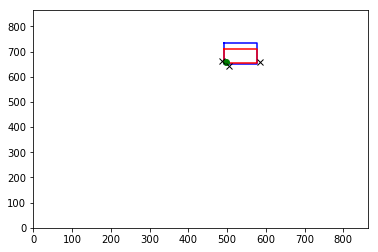

won: True


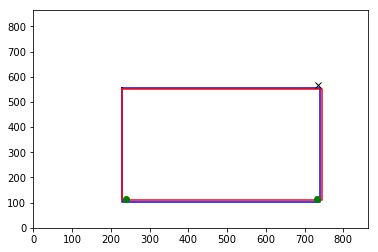

won: True


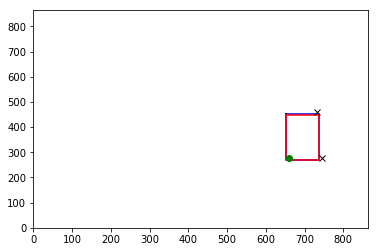

won: True


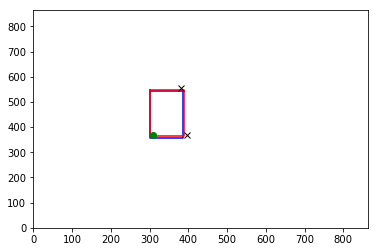

won: True


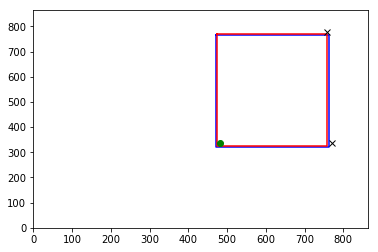

won: True


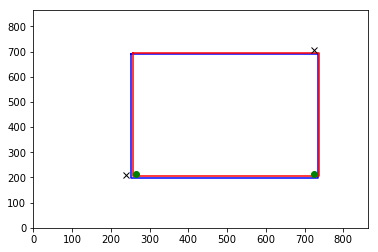

won: True


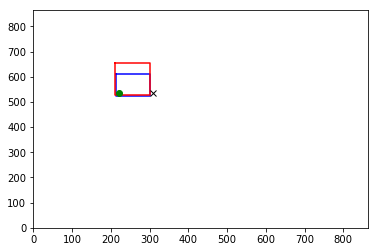

won: True


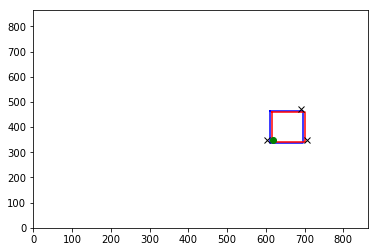

won: True


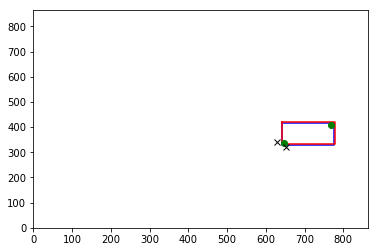

won: True


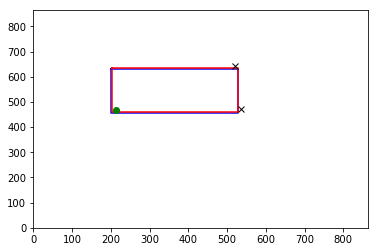

won: True


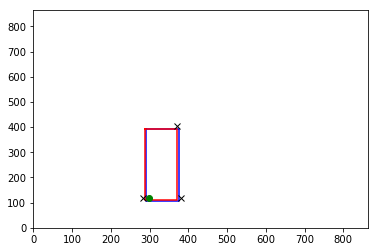

won: True


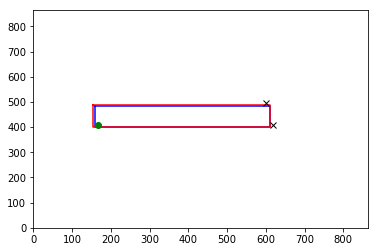

won: True


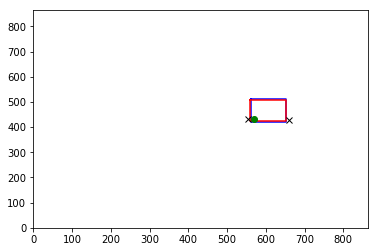

won: True


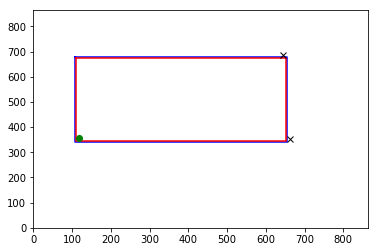

won: True


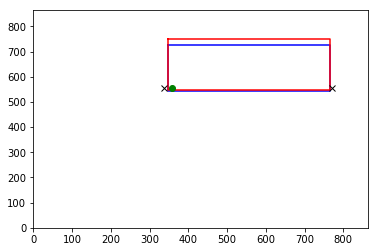

won: True


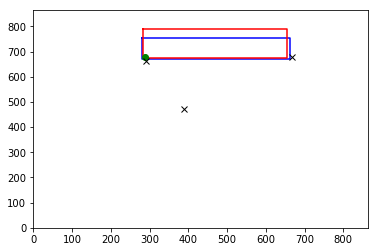

won: True


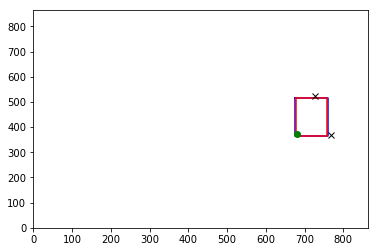

Learners Age: 10 Teachers Age 10
won: True


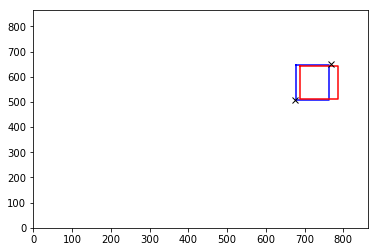

won: True


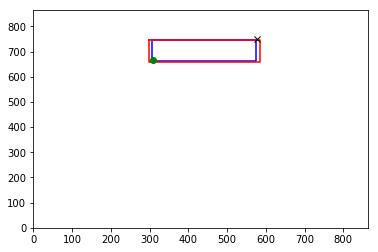

won: True


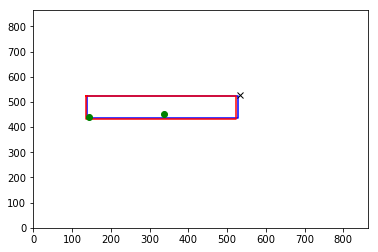

won: True


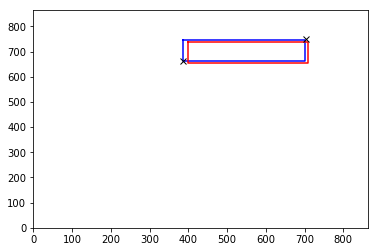

won: True


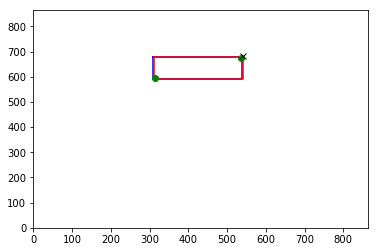

Learners Age: 12 Teachers Age 10
won: True


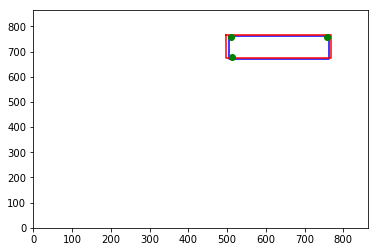

won: True


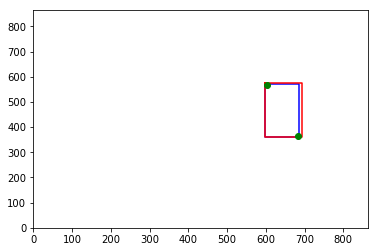

won: True


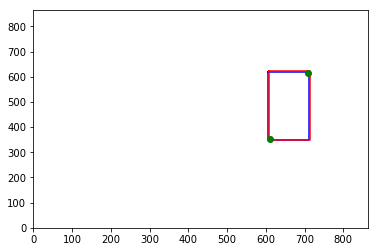

won: True


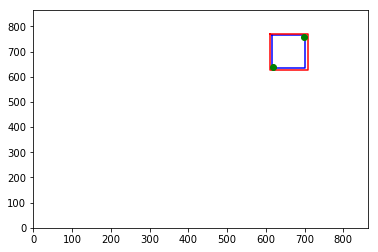

won: True


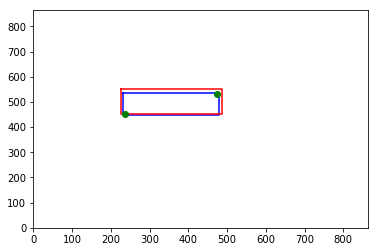

won: True


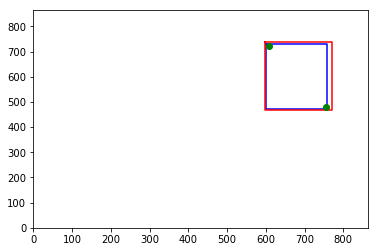

won: True


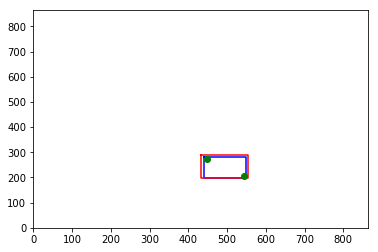

won: True


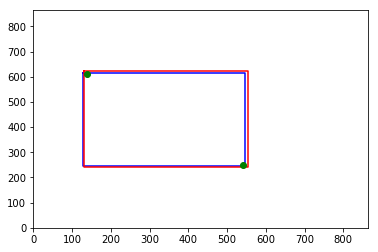

won: True


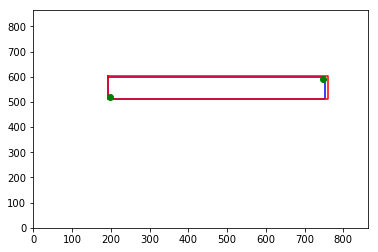

won: True


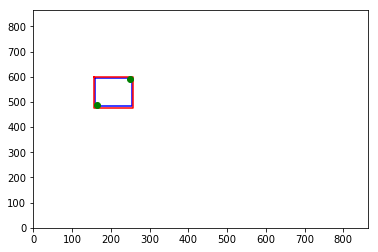

won: True


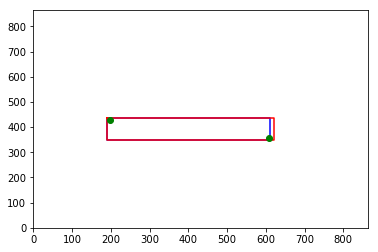

won: True


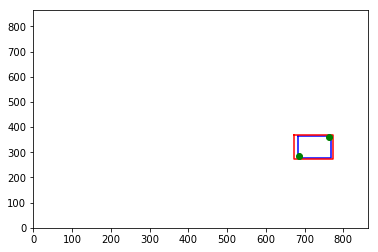

won: True


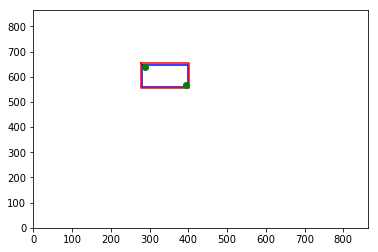

won: True


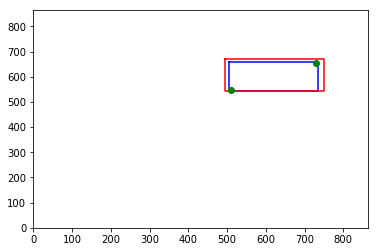

won: True


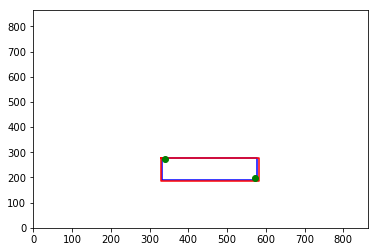

won: True


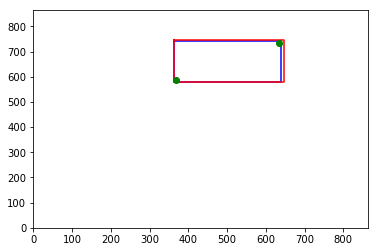

won: True


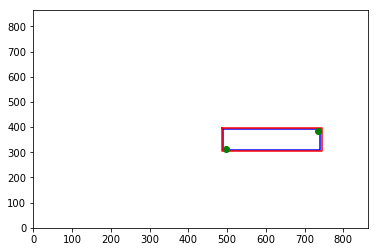

won: True


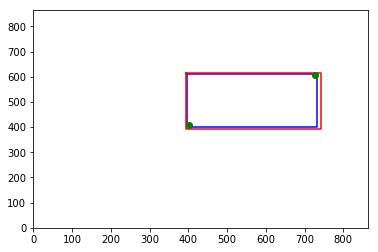

won: True


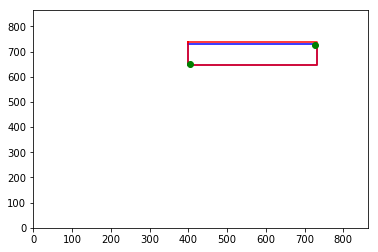

won: True


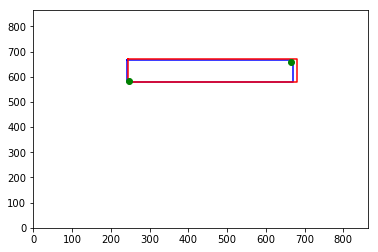

Learners Age: 18 Teachers Age 16
won: True


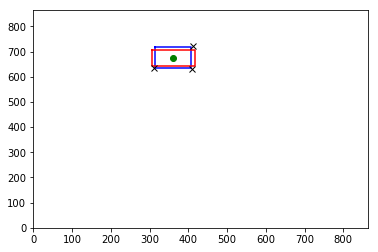

won: True


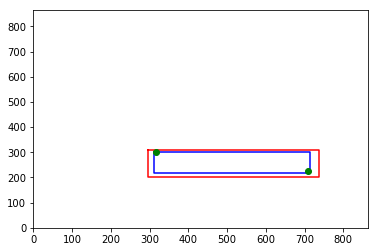

won: True


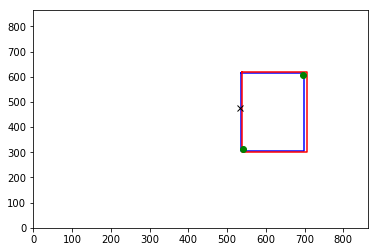

won: True


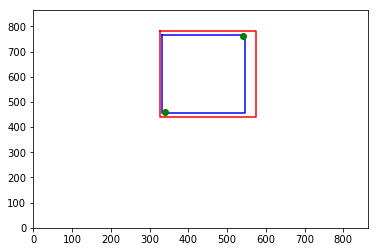

won: True


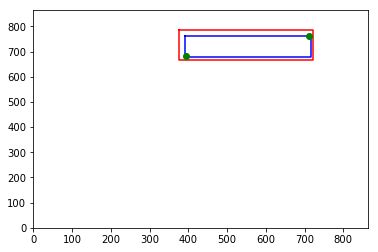

won: True


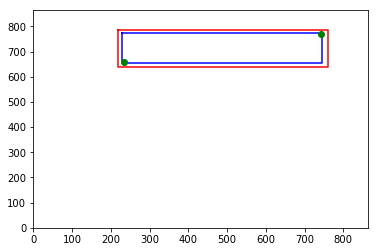

won: True


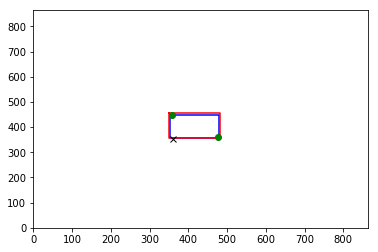

won: True


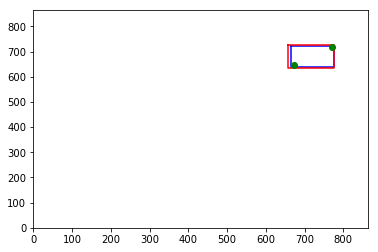

won: True


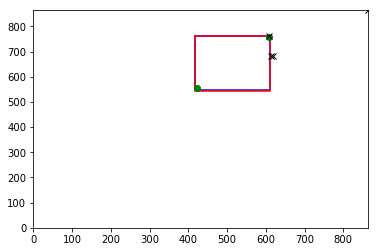

won: True


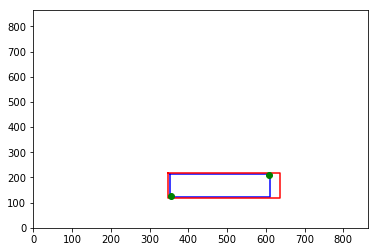

won: True


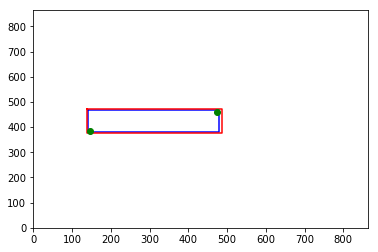

won: True


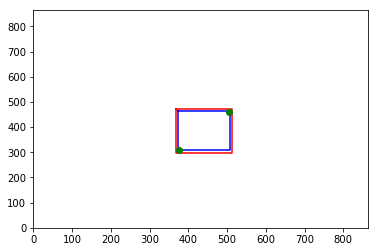

won: True


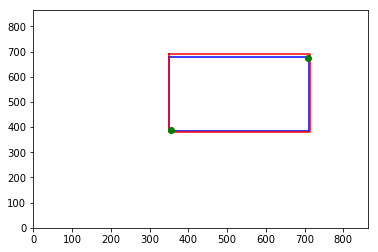

won: True


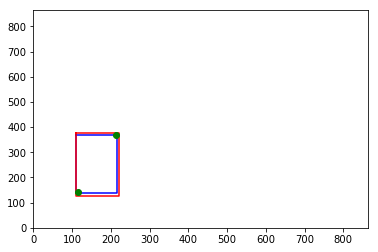

won: True


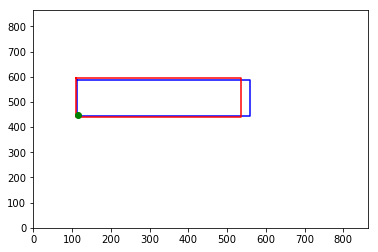

won: True


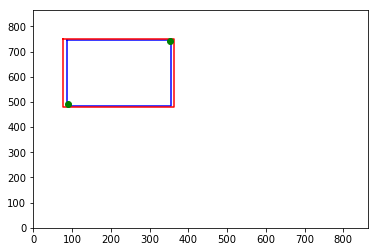

won: True


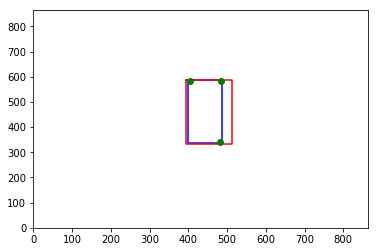

won: True


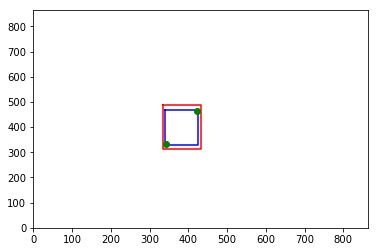

won: True


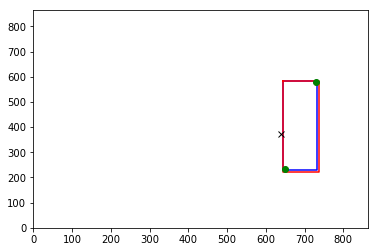

won: True


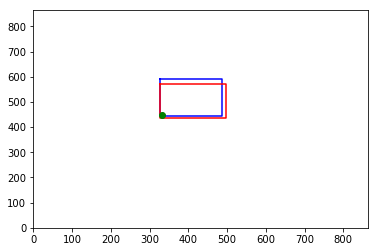

Learners Age: 10 Teachers Age 10
won: True


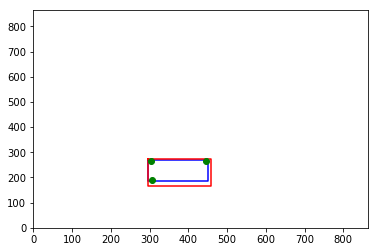

won: True


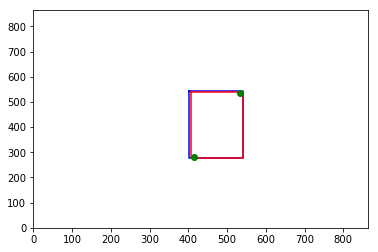

won: True


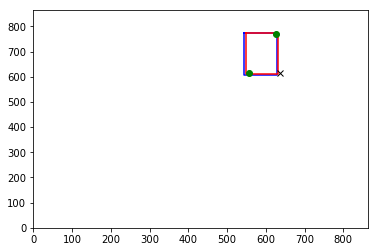

won: True


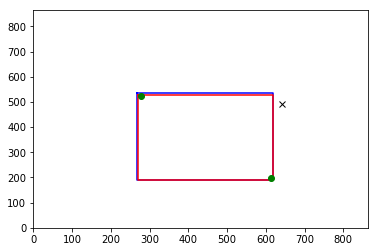

won: True


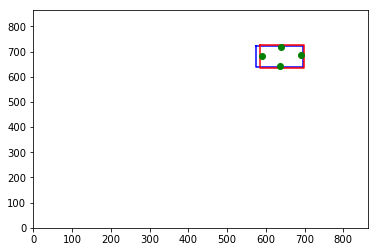

Learners Age: 7 Teachers Age 8
won: True


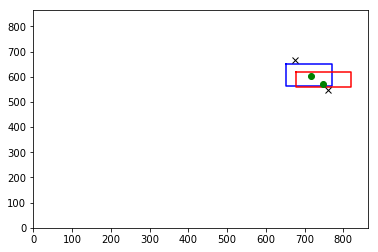

won: True


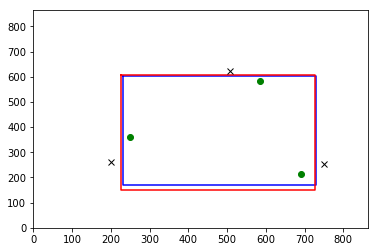

won: True


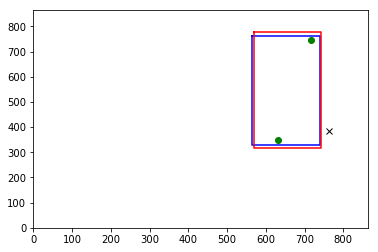

won: True


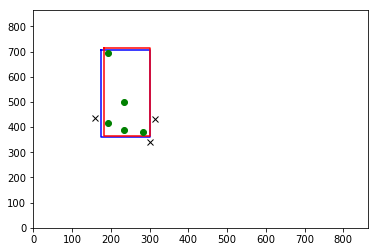

won: True


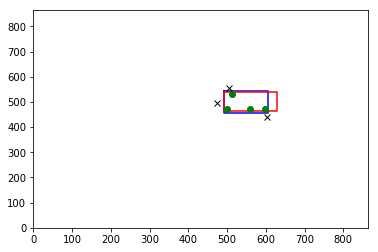

Learners Age: 56 Teachers Age 42
won: True


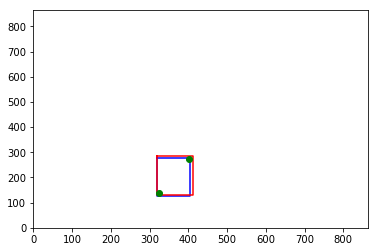

won: True


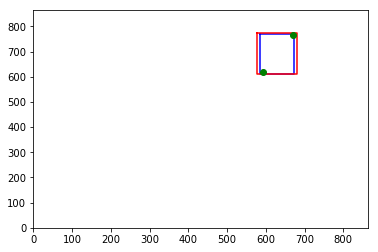

won: True


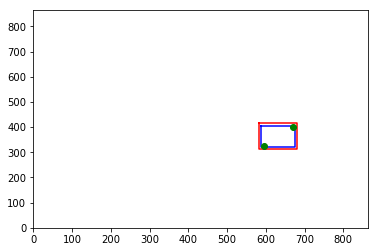

won: True


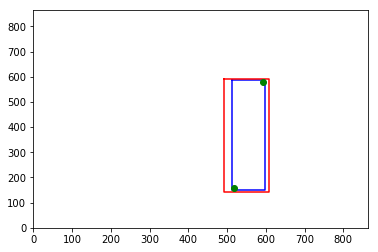

won: True


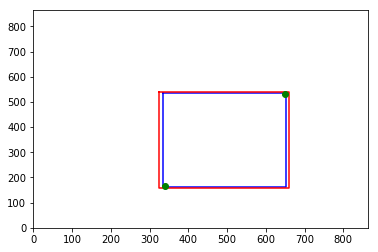

won: True


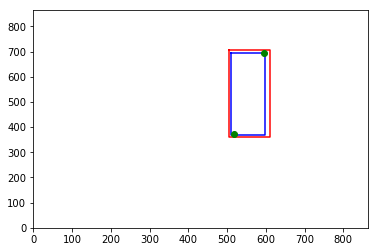

won: True


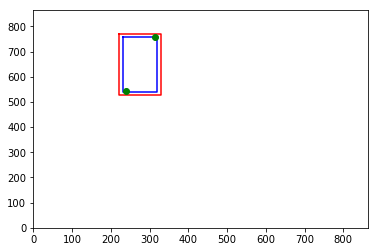

won: True


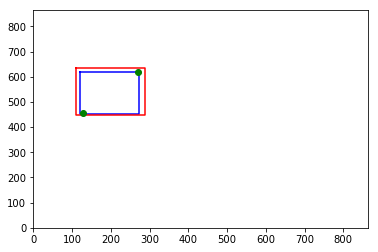

won: True


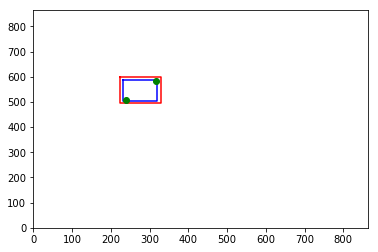

won: True


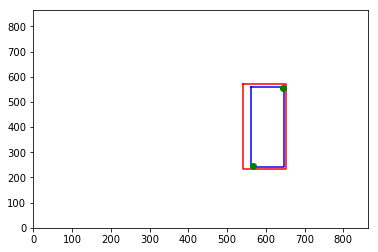

won: True


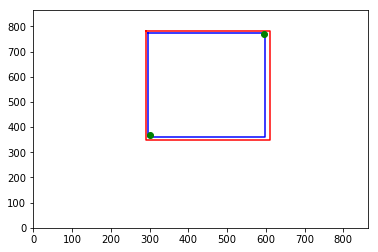

won: True


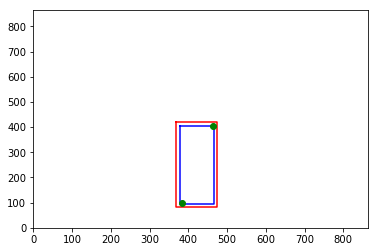

won: True


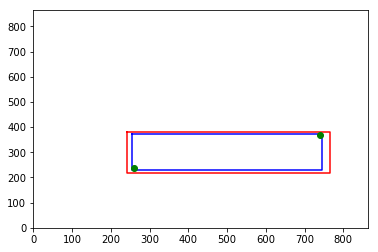

won: True


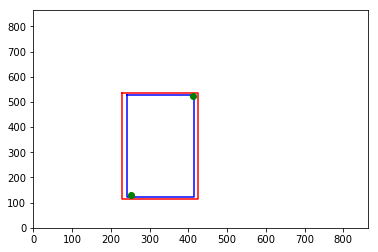

won: True


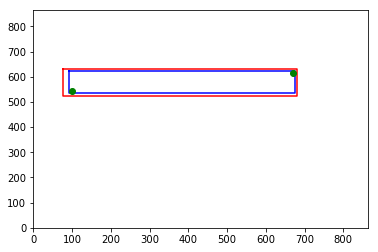

won: True


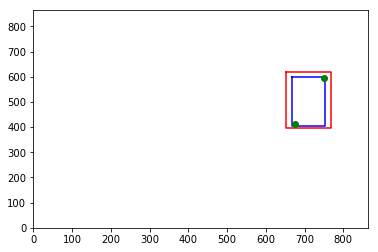

won: True


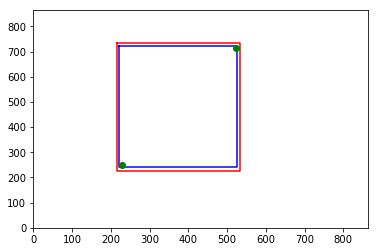

won: True


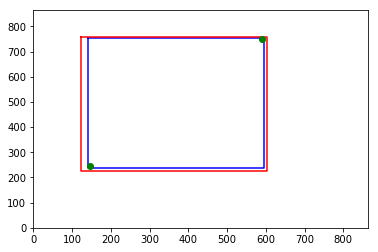

won: True


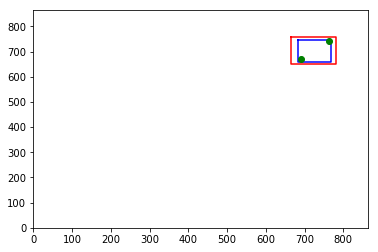

won: True


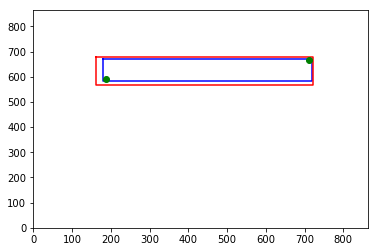

Learners Age: 7 Teachers Age 7
won: False


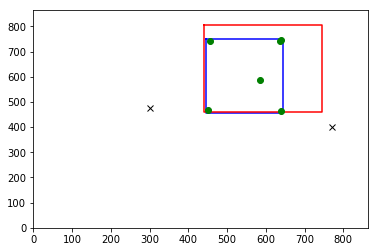

won: True


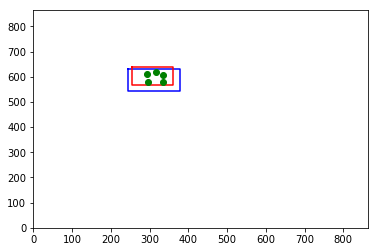

won: False


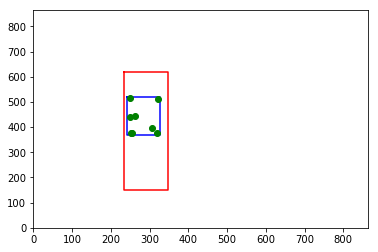

won: False


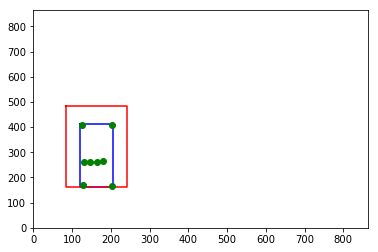

won: False


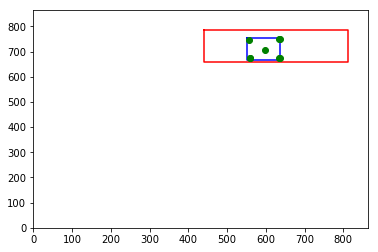

Learners Age: 10 Teachers Age 10
won: False


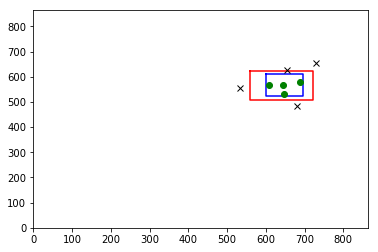

won: True


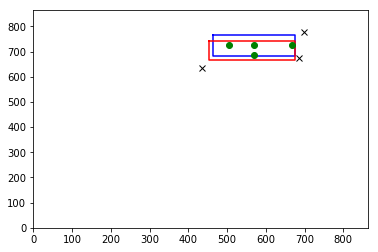

won: True


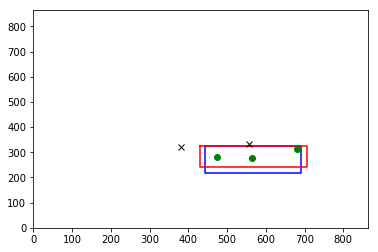

won: True


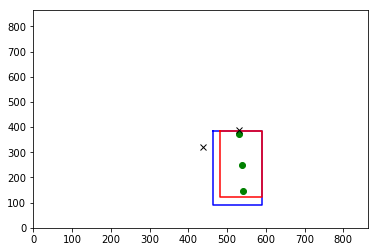

won: True


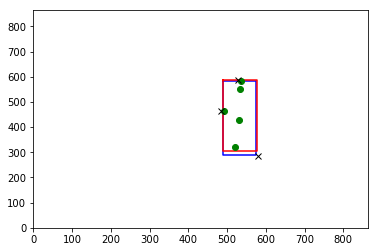

won: True


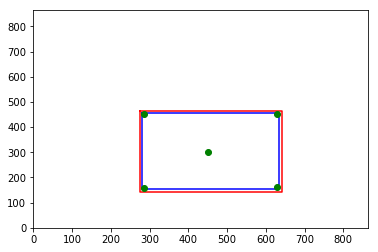

won: True


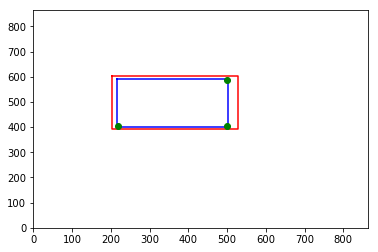

won: True


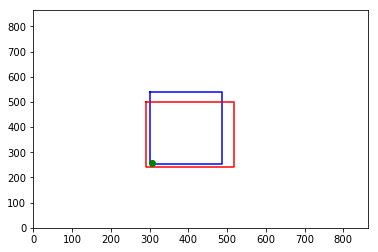

won: True


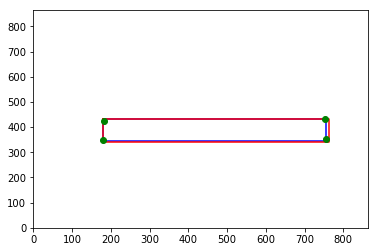

won: True


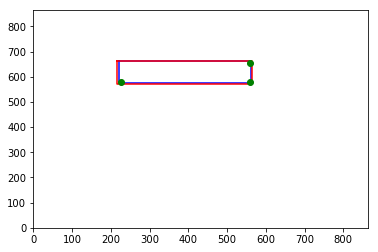

won: True


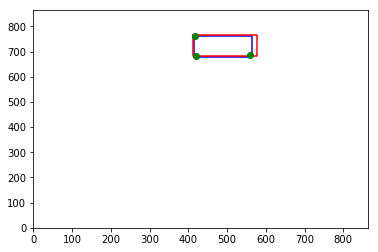

won: True


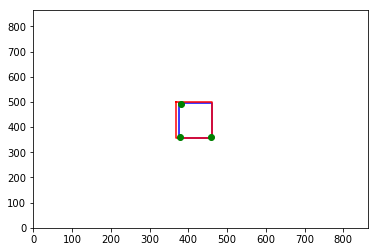

won: True


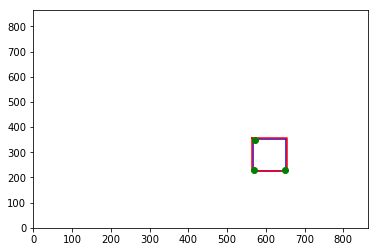

won: True


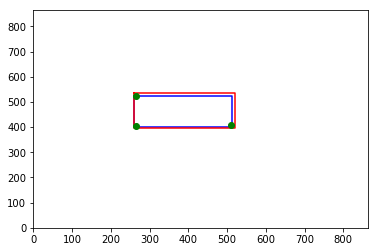

won: True


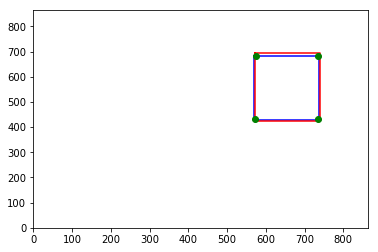

won: True


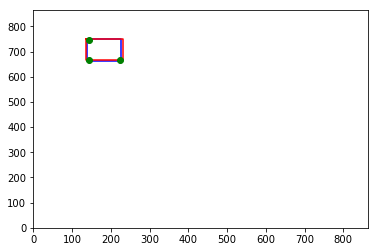

won: True


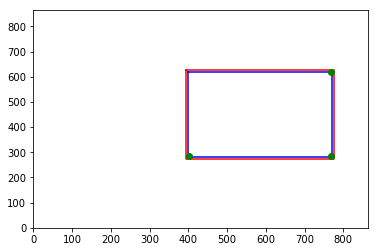

won: True


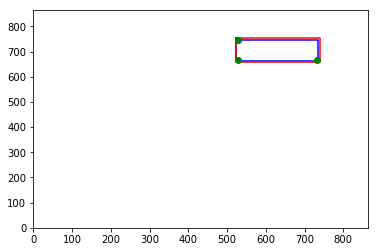

won: True


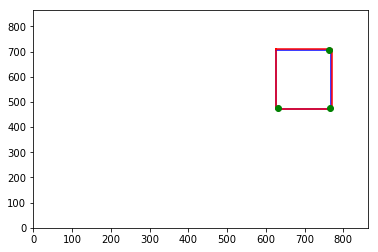

won: True


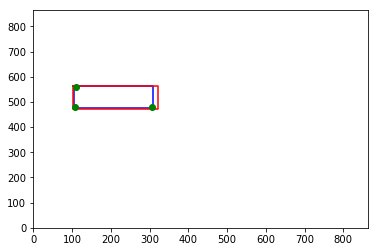

Learners Age: 8 Teachers Age 8
won: False


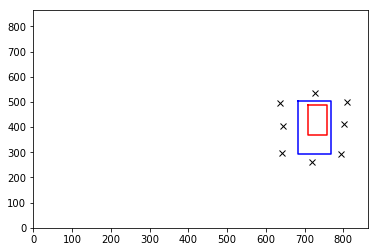

won: False


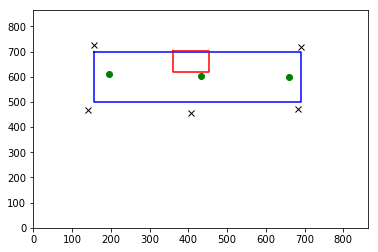

won: False


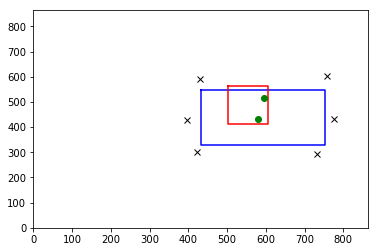

won: False


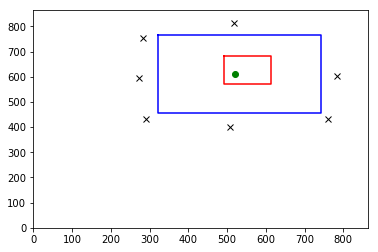

won: True


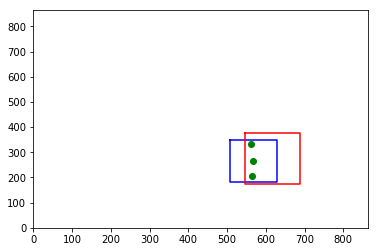

Learners Age: 50 Teachers Age 38
won: True


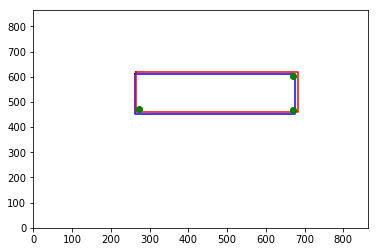

won: True


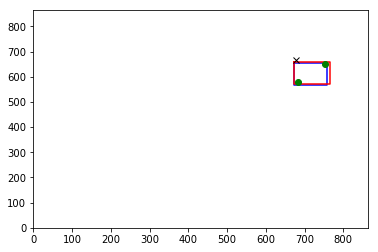

won: True


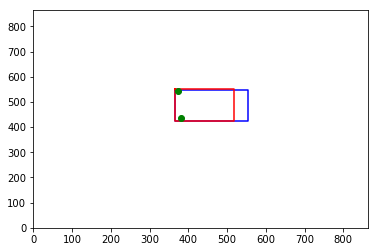

won: True


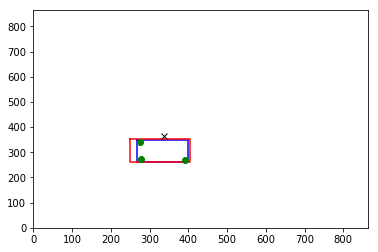

won: True


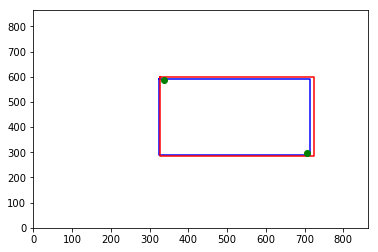

won: True


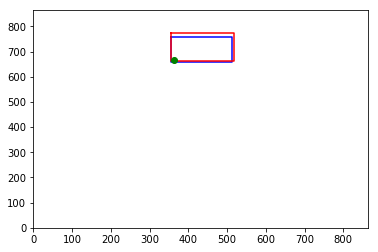

won: True


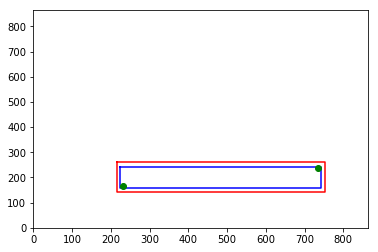

won: True


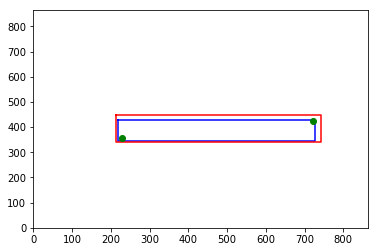

won: True


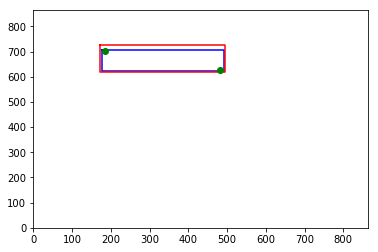

won: True


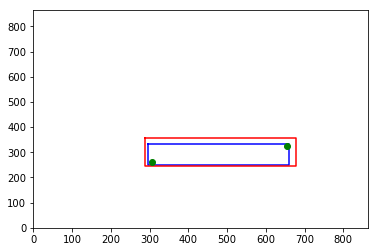

won: True


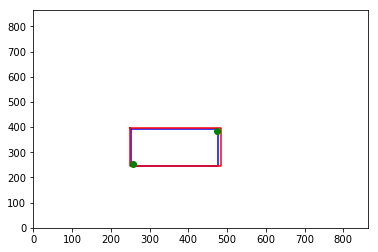

won: True


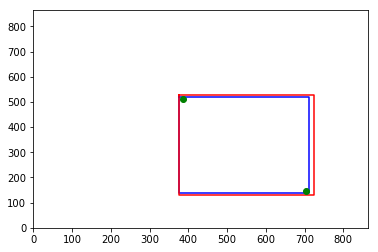

won: True


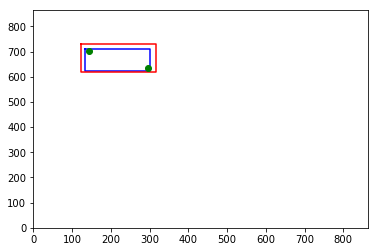

won: True


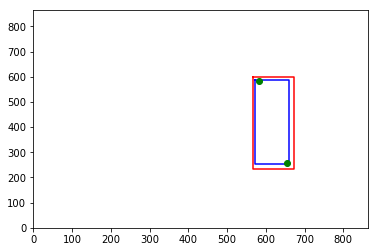

won: True


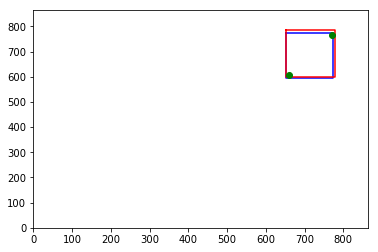

won: True


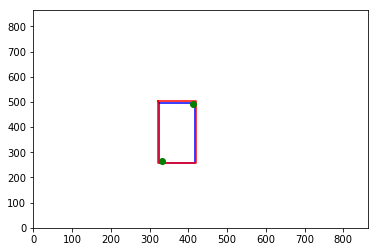

won: True


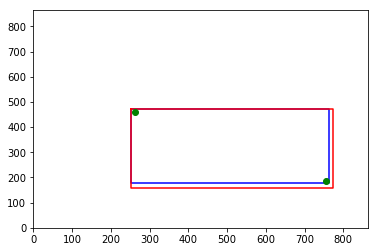

won: True


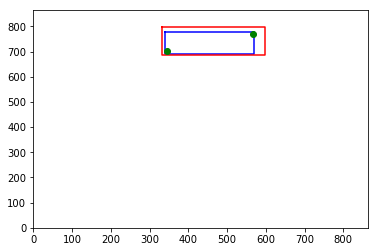

won: True


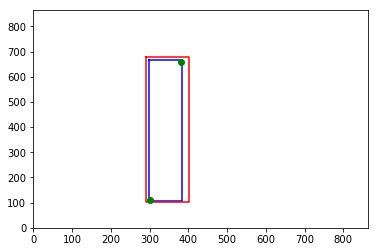

won: True


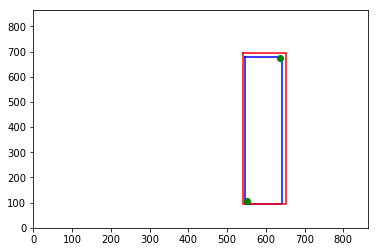

Learners Age: 9 Teachers Age 10
won: True


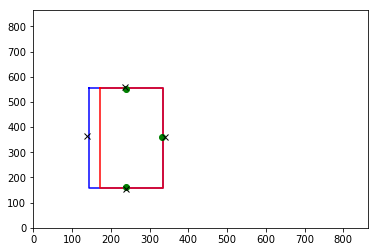

won: True


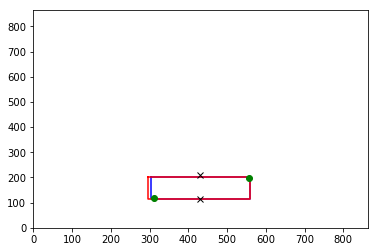

won: True


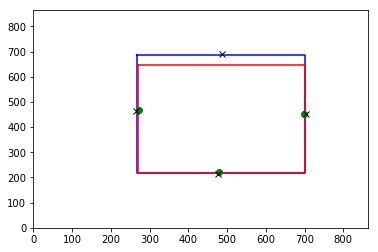

won: True


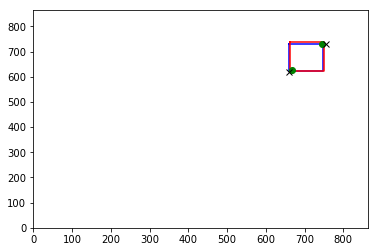

won: True


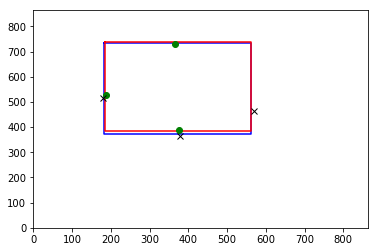

won: True


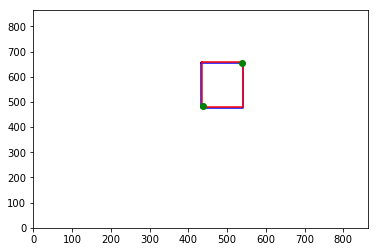

won: True


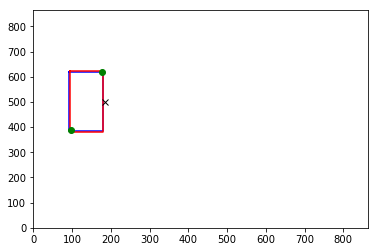

won: True


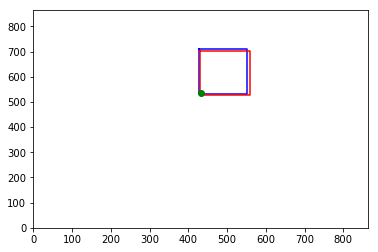

won: True


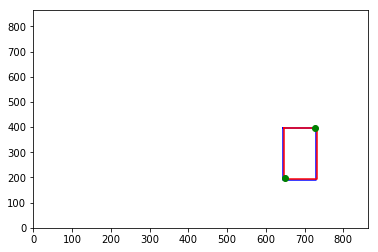

won: True


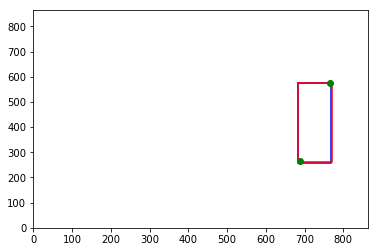

won: True


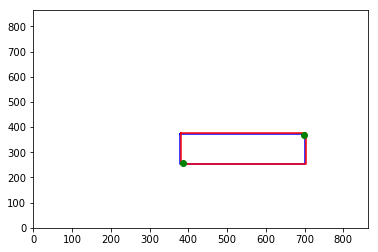

won: True


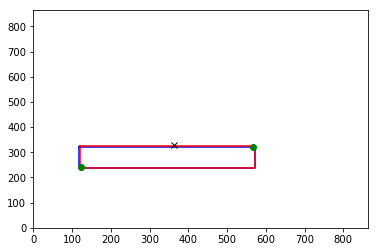

won: True


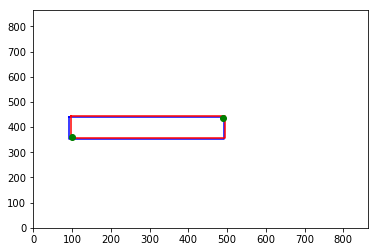

won: True


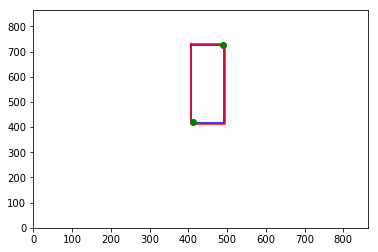

won: True


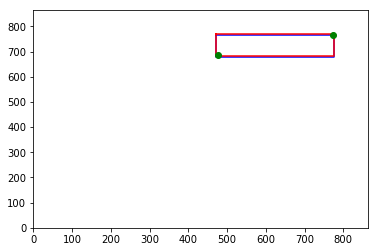

Learners Age: 9 Teachers Age 9
won: True


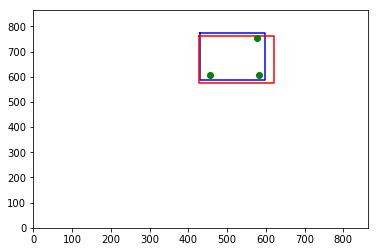

won: True


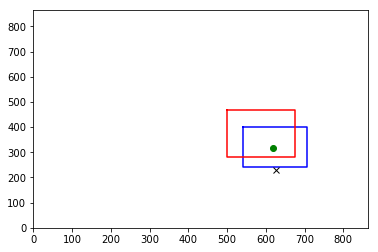

won: True


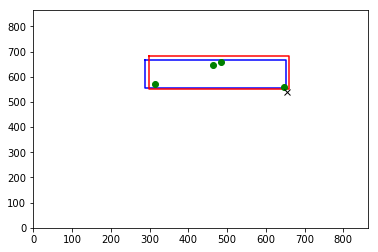

won: True


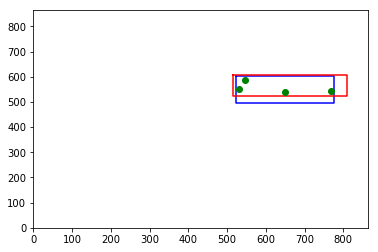

won: True


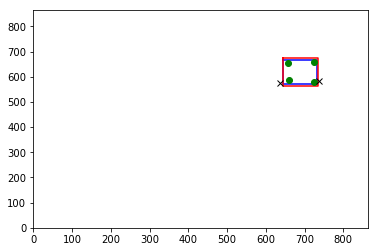

Learners Age: 52 Teachers Age 56
won: True


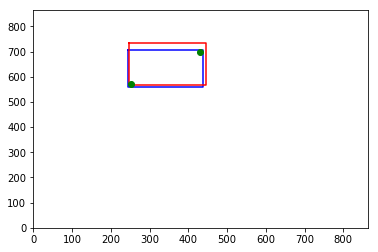

won: True


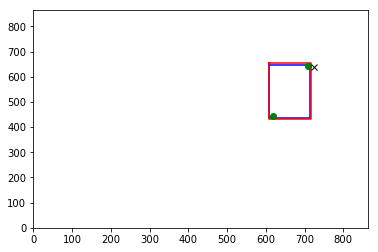

won: True


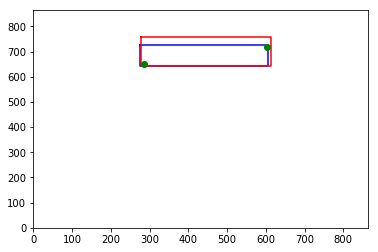

won: True


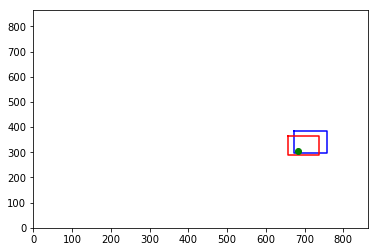

won: True


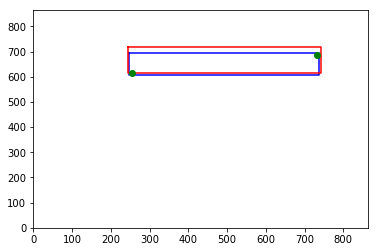

won: True


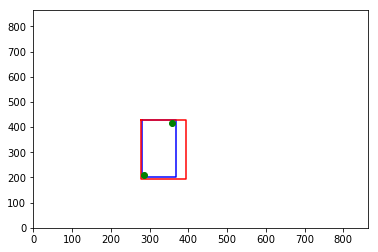

won: True


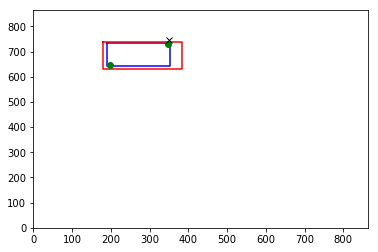

won: True


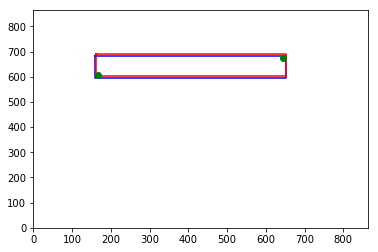

won: True


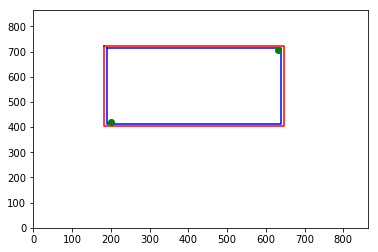

won: True


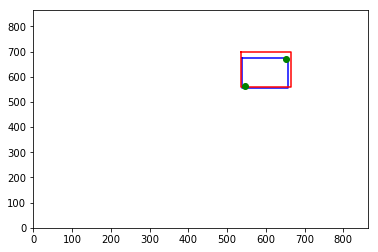

won: True


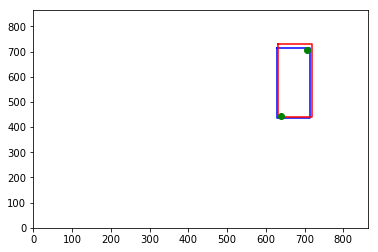

won: True


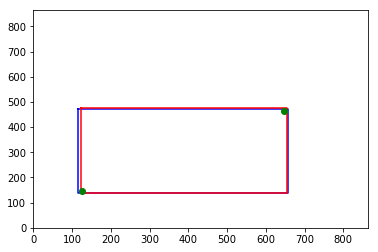

won: True


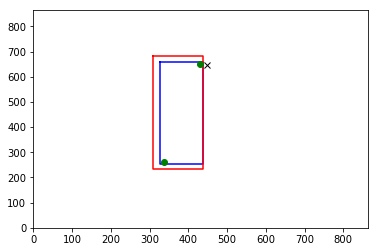

won: True


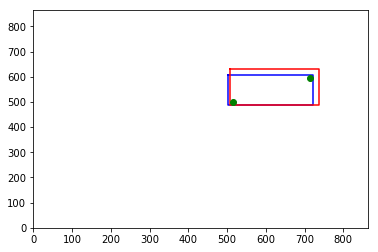

won: True


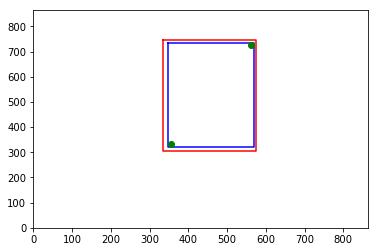

Learners Age: 20 Teachers Age 28
won: True


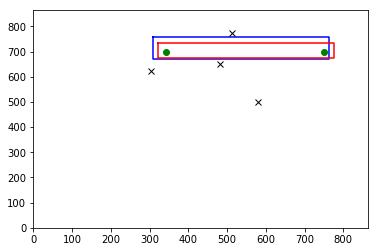

won: True


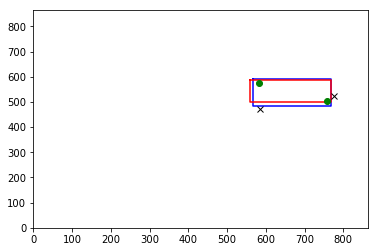

won: True


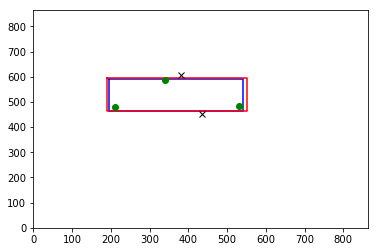

won: True


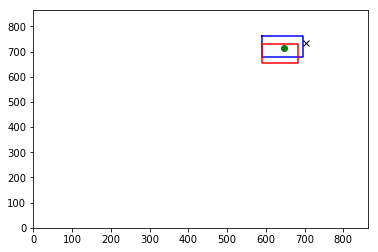

won: True


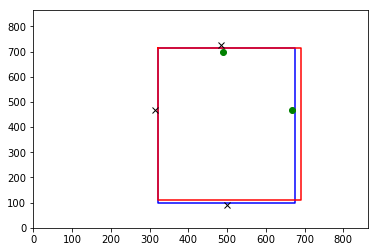

won: True


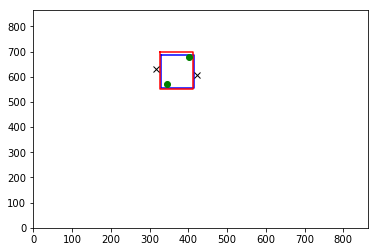

won: True


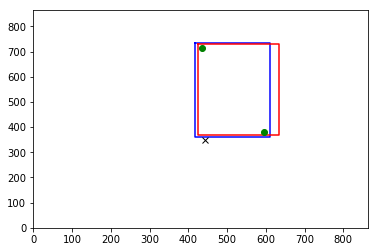

won: True


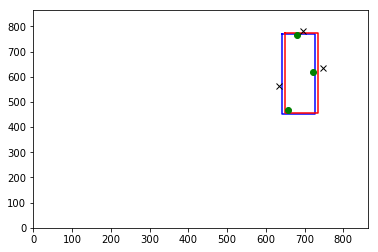

won: True


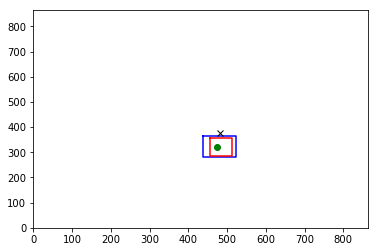

won: True


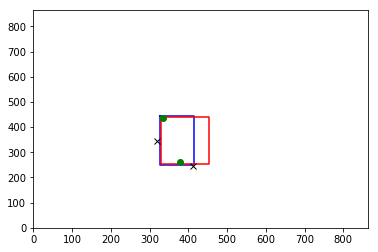

won: True


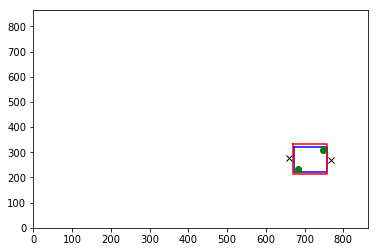

won: True


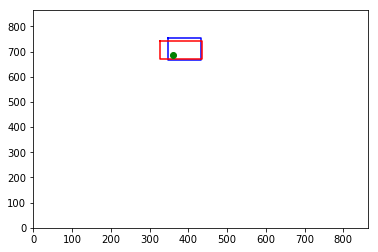

won: True


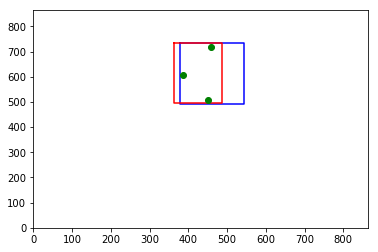

won: True


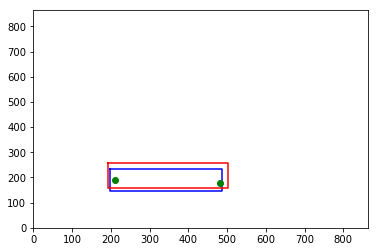

won: True


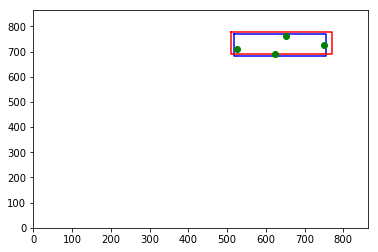

won: True


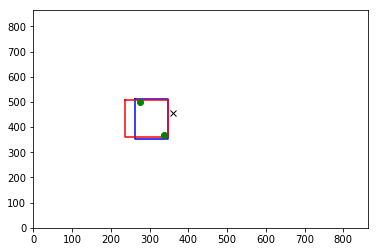

won: True


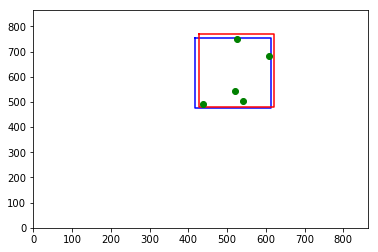

won: True


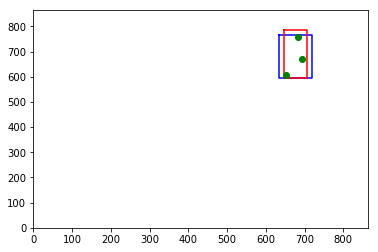

won: True


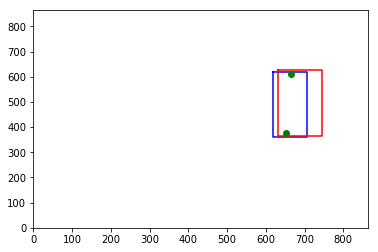

won: True


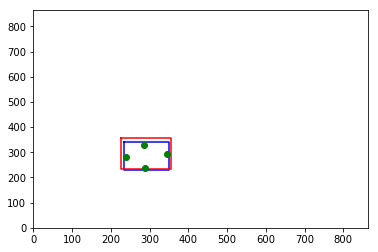

Learners Age: 11 Teachers Age 6
won: False


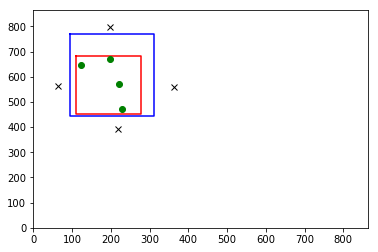

won: True


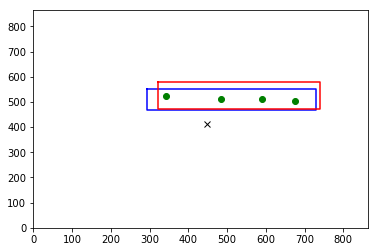

won: True


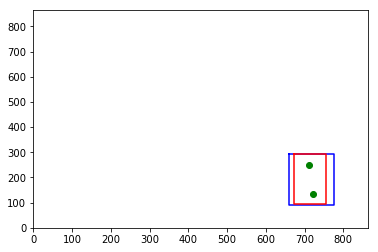

won: True


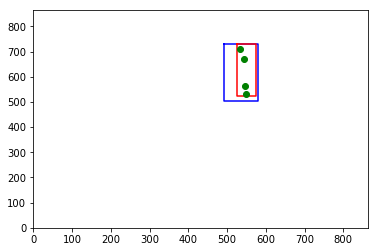

won: True


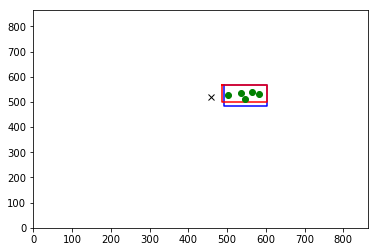

won: True


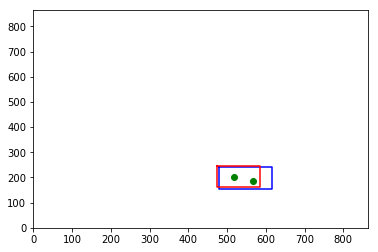

won: True


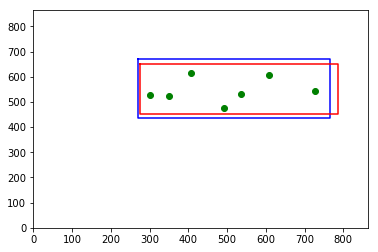

won: True


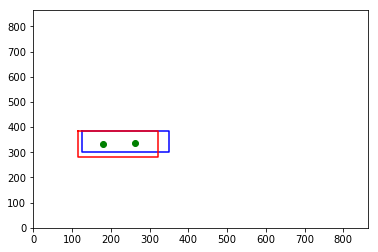

won: True


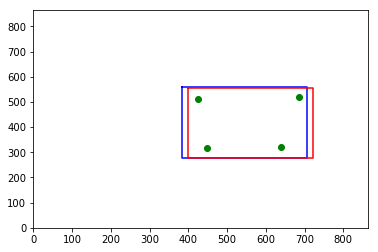

won: True


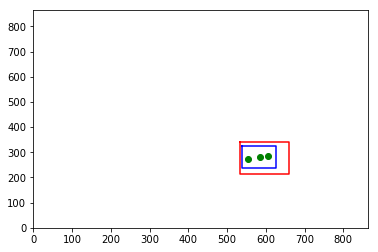

won: True


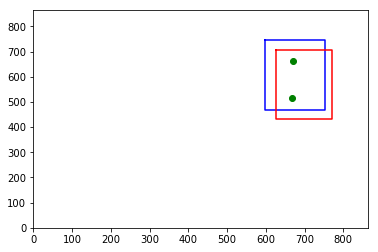

won: True


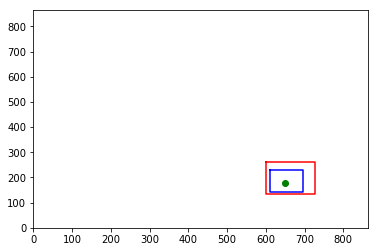

won: True


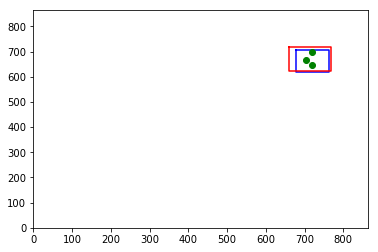

won: True


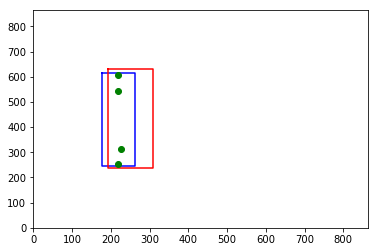

won: True


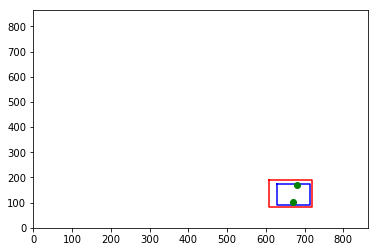

In [13]:
for d in Data:
    print('Learners Age:',d['Learners_age'],'Teachers Age',d['Teachers_age'])
    for t in d['Trials']:
        print('won:',t['won'])
        draw_trial(t)
    
    
    
    

In [ ]:
n_trials=[];
n_examples=[];
sd_examples=[];
n_examples_win=[];
sd_examples_win=[];
p_win=[];
time=[];
edades=[];
workable_trial=0;
non_workable_trial=0;
workable_couple=0;
for P in Data:
    edades.append(str(P['Teachers_age'])+'-'+str(P['Learners_age']))
    n_trials.append(len(P['Trials']));    
    time.append(P['Total_time']);    
    nex=[];
    nex_w=[];
    n_won=0;
    for trial in P['Trials']:
        nex.append(len(trial['Circles'])+len(trial['Crosses']));
        if trial['won']:
            nex_w.append(len(trial['Circles'])+len(trial['Crosses']));            
    n_examples.append(np.mean(nex));
    sd_examples.append(np.std(nex));
    n_examples_win.append(np.mean(nex_w));
    sd_examples_win.append(np.std(nex_w));
    p_win.append(len(nex_w)/len(nex));
    flag=True;
    if not(P['Conscent']):
        print(P['Teachers_Id'])
    for trial in P['Trials']:
        if not trial['Crosses'] or not trial['Circles']:            
            workable_trial+=1;
            if flag:
                workable_couple+=1;
                flag=False;
                

In [ ]:
a=[1,2,3]
np.std(a)

In [ ]:
print('Edades','||||','Trials','||||','% win','||||','av. examples','||||','av. examples|w','||||','time')
[print (*[edades[i],'||||',n_trials[i],'||||',round(p_win[i]*10)/10,'||||',round(n_examples[i]*10)/10,'+/-',round(sd_examples[i]*10)/10,'||||',round(n_examples_win[i]*10)/10,'+/-',round(sd_examples_win[i]*10)/10,'||||',round(time[i]*10)/10]) for i in range(0,len(time))];


In [ ]:
def individual_histogram(pair,center): # as in the paper. # center: make the box be in the center of the crosses histogram
    n_bins=3;
    canvas_size=865;
    inner_bins=np.zeros([n_bins,n_bins]); 
    if center:
        outer_bins=np.zeros([2*n_bins+1,2*n_bins+1]);             
    else:
        outer_bins=np.zeros([n_bins+1,n_bins+1]);             
    n_trial=-1;
    for trial in pair['Trials']:
            n_trial=n_trial+1;
            box=trial['Teachers_box'];
            width=box[1]-box[0];
            height=box[3]-box[2];                
            for circle in trial['Circles']:
                x=circle[0]-box[0];
                y=circle[1]-box[2];
                x_bin=np.int(np.floor(x/(width/n_bins)));
                y_bin=np.int(np.floor(y/(height/n_bins)));
                if(x_bin==3):
                    x_bin=2;
                if(y_bin==3):
                    y_bin=2;                
                inner_bins[x_bin,y_bin ]=inner_bins[x_bin,y_bin]+1;                
            for cross in trial['Crosses']:
                if (cross[0]-box[0])<0: #left side
                    x=box[0]-cross[0];
                    x_bin=np.int(np.floor(x/(box[0]/n_bins)))+1; # bins 1,2 or 3
                    if center:
                        x_bin=-x_bin+n_bins; # make the box be in the center
                elif cross[0]>box[1]: #right side
                    x=cross[0]-box[1];
                    x_bin=np.int(np.floor(x/((canvas_size-box[1])/n_bins)))+1;
                    if center:
                        x_bin=x_bin+n_bins;
                else: # above or below the box
                    x_bin=0;
                    if center:
                        x_bin=x_bin+n_bins;
                if (cross[1]-box[2])<0: # above
                    y=box[2]-cross[1];
                    y_bin=np.int(np.floor(y/(box[2]/n_bins)))+1;
                    if center:
                        y_bin=y_bin+n_bins;
                elif cross[1]>box[3]: # below
                    y=cross[1]-box[3];
                    y_bin=np.int(np.floor(y/((canvas_size-box[3])/n_bins)))+1;
                    if center:
                        y_bin=-y_bin+n_bins;
                else:                                                                              
                    y_bin=0;                
                    if center:
                        y_bin=y_bin+n_bins;
                outer_bins[x_bin,y_bin]=outer_bins[x_bin,y_bin]+1;            
    return inner_bins, outer_bins;


def plot_inner_histo(histo_inside):
    fig=plt.figure();
    plt.pcolor(np.flip(histo_inside,0),cmap='Greys')     
    plt.colorbar();    
    plt.plot([0,3,3,0,0],[0,0,3,3,0],'b')
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)    
    plt.show()
    
    
    
def plot_outer_histo(histo_outside,center):
    fig=plt.figure();
    plt.title('')        
    if center:
        plt.pcolor(np.flip(histo_outside,0),cmap='Greys')
        plt.plot([3,4,4,3,3],[3,3,4,4,3],'b')
        plt.xlim([0,7])
        plt.ylim([0,7])    
    else:
        plt.pcolor(histo_outside,cmap='Greys')
        plt.plot([0,1,1,0,0],[0,0,1,1,0],'b')
        plt.xlim([-0.03,4])
        plt.ylim([-0.01,4])    
    plt.colorbar();    
    plt.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)
    plt.show()

In [ ]:
i=0;
for pair in Data:    
    [inner,outer]=individual_histogram(pair,True);
    print('Edad-T:'+str(pair['Teachers_age'])+' Edad-L:'+str(pair['Learners_age']))
    plot_inner_histo(inner)
    plot_outer_histo(outer,True)
    

In [ ]:
print(inner)
print(np.flip(inner,0))